# Shoe Sales Time Series Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.chdir('Downloads')

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#Read the data as an appropriate Time Series data and plot the data.

In [ ]:
shoesales=pd.read_csv('Shoesales.csv',index_col='YearMonth', parse_dates=True)

In [ ]:
shoesales

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91
...,...
1995-03-01,188
1995-04-01,195
1995-05-01,189


In [ ]:
shoesales.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


In [ ]:
shoesales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


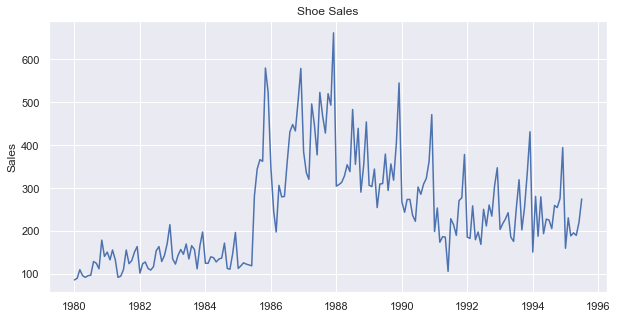

In [ ]:
# Plot the data
plt.figure(figsize=(10,5))
plt.plot(shoesales)
plt.title('Shoe Sales')
plt.ylabel('Sales')
plt.show()

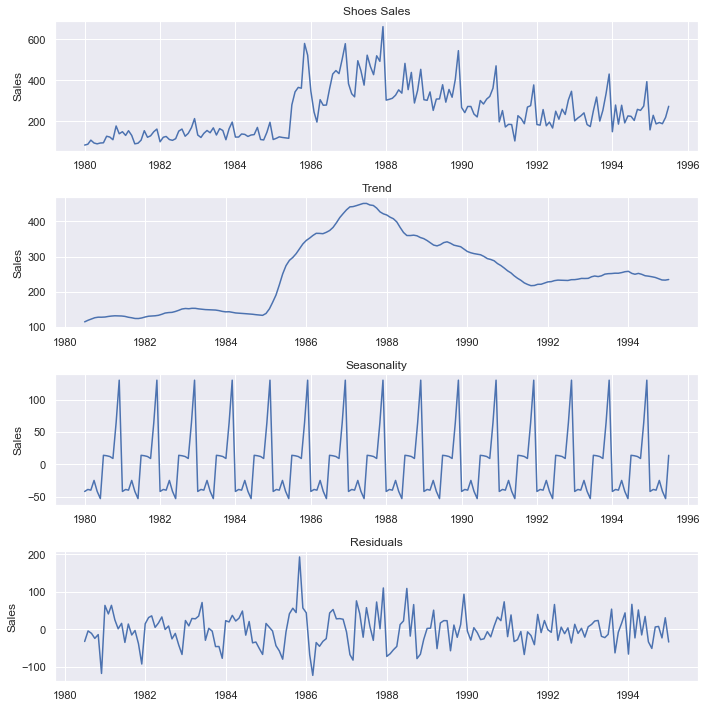

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the data
decomposition = seasonal_decompose(shoesales, model='additive')

# Plot the decomposition
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.plot(shoesales)
plt.title('Shoes Sales')
plt.ylabel('Sales')
plt.subplot(4,1,2)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.ylabel('Sales')
plt.subplot(4,1,3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.ylabel('Sales')
plt.subplot(4,1,4)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


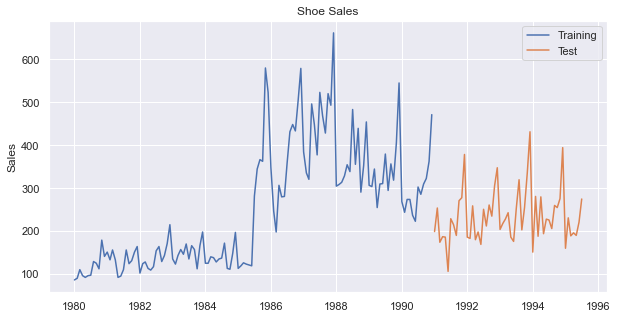

In [ ]:
# Split the data into training and test sets
train =shoesales[shoesales.index < '1991']
test = shoesales[shoesales.index >= '1991']

# Plot the training and test data
plt.figure(figsize=(10,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.title('Shoe Sales')
plt.ylabel('Sales')
plt.legend()
plt.show()






In [ ]:
import numpy as np

def rmse(actual, forecast):
    """
    Calculates the Root Mean Squared Error (RMSE) between the actual and forecasted values.

    Parameters:
    actual (array-like): Actual values
    forecast (array-like): Forecasted values

    Returns:
    float: RMSE
    """
    return np.sqrt(((actual - forecast) ** 2).mean())


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
# Exponential smoothing models
models = [
    {'name': 'Simple exponential smoothing', 'model': ExponentialSmoothing(train['Shoe_Sales'], trend=None, seasonal=None, damped=False)},
    {'name': 'Holt’s linear trend method', 'model': ExponentialSmoothing(train['Shoe_Sales'], trend='mul', seasonal=None, damped=False)},
    {'name': 'Holt-Winters method (additive)', 'model': ExponentialSmoothing(train['Shoe_Sales'], trend='mul', seasonal='add', damped=False)},
    {'name': 'Holt-Winters method (multiplicative)', 'model': ExponentialSmoothing(train['Shoe_Sales'], trend='mul', seasonal='mul', damped=False)}
]

# Fit models and make predictions on test set
for m in models:
    model_fit = m['model'].fit()
    m['pred'] = model_fit.forecast(len(test))
    m['hw_rmse'] = np.sqrt(mean_squared_error(test['Shoe_Sales'], m['pred']))
    print(f"{m['name']}: RMSE = {m['hw_rmse']:.2f}")

C:\Users\OmAruna-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\OmAruna-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\OmAruna-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\OmAruna-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simple exponential smoothing: RMSE = 196.40
Holt’s linear trend method: RMSE = 665.43
Holt-Winters method (additive): RMSE = 270.97
Holt-Winters method (multiplicative): RMSE = 325.48


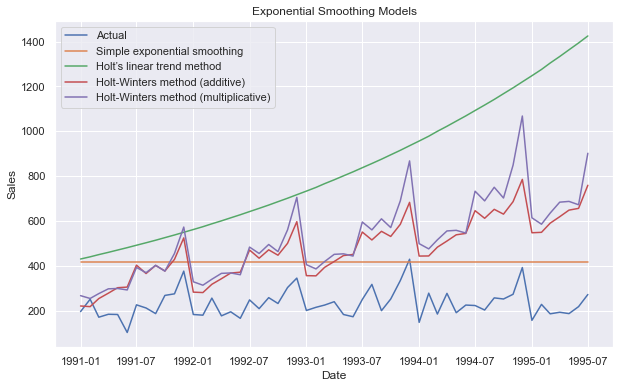

In [ ]:
# Plot actual sales data

fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual sales data
ax.plot(test.index, test['Shoe_Sales'], label='Actual')

# Plot predicted values for each model
for m in models:
    ax.plot(test.index, m['pred'], label=m['name'])

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Exponential Smoothing Models')

# Show plot
plt.show()

In [ ]:
# Naive forecast model
y_pred_naive = test.shift(1).fillna(train.iloc[-1])

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_naive = np.sqrt(mean_squared_error(test, y_pred_naive))
print(f'RMSE for Naive Forecast Model: {rmse_naive:.2f}')


RMSE for Naive Forecast Model: 91.90


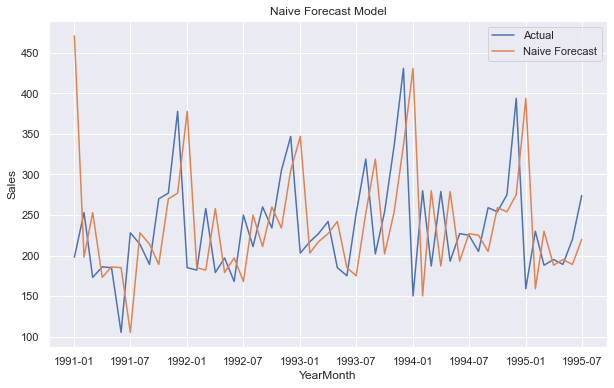

In [ ]:
# Create a larger figure with 10x6 inches size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual sales data
ax.plot(test['Shoe_Sales'], label='Actual')

# Plot naive forecast predictions
ax.plot(y_pred_naive, label='Naive Forecast')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('YearMonth')
ax.set_ylabel('Sales')
ax.set_title('Naive Forecast Model')

# Show plot
plt.show()

In [ ]:
window_size = 5

shoesales_simple_avg = train['Shoe_Sales'].rolling(window=window_size).mean().iloc[-1]
shoesales_simple_avg = pd.DataFrame(shoesales_simple_avg, index=test.index, columns=['Simple_Average'])
shoesales_simple_rmse = rmse(test['Shoe_Sales'], shoesales_simple_avg['Simple_Average'])

print('Simple Average Model RMSE (window size = {}): {:.2f}'.format(window_size, shoesales_simple_rmse))


Simple Average Model RMSE (window size = 5): 131.42


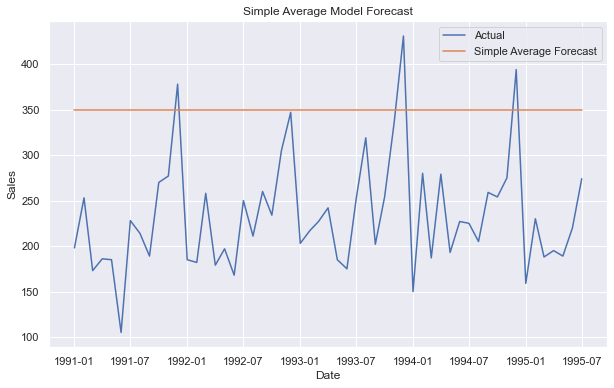

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

# Plot actual sales data
ax.plot(test.index, test['Shoe_Sales'], label='Actual')

# Plot simple average forecast predictions
ax.plot(shoesales_simple_avg.index, shoesales_simple_avg['Simple_Average'], label='Simple Average Forecast')

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Simple Average Model Forecast')

plt.show()

In [ ]:

train['Shoe_Sales'].fillna(train['Shoe_Sales'].mean(), inplace=True)
test['Shoe_Sales'].fillna(test['Shoe_Sales'].mean(), inplace=True)


In [ ]:
def rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

# Compute the moving average and RMSE
shoesales_moving_avg = pd.DataFrame(train['Shoe_Sales'].rolling(window=12).mean().iloc[-1], index=test.index, columns=['Moving_Average'])
shoesales_moving_rmse = rmse(test['Shoe_Sales'], shoesales_moving_avg['Moving_Average'])

# Print the results
print('Moving Average Model RMSE:', shoesales_moving_rmse)


Moving Average Model RMSE: 88.48518394498471


In [ ]:
from sklearn.linear_model import LinearRegression
shoesales_lr=shoesales.copy()
# create lagged features
shoesales_lr['shoesales_lag1'] =shoesales_lr['Shoe_Sales'].shift(1)
shoesales_lr.dropna(inplace=True)

# split the data into training and test sets
train_lr = shoesales_lr.loc[:'1990']
test_lr = shoesales_lr.loc['1991':]


# fit the linear regression model
X_train = train_lr['shoesales_lag1'].values.reshape(-1, 1)
y_train = train_lr['shoesales_lag1'].values
lr_model = LinearRegression().fit(X_train, y_train)

# evaluate the model on the test set
X_test = test_lr['shoesales_lag1'].values.reshape(-1, 1)
y_test = test_lr['Shoe_Sales'].values
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


RMSE: 91.90


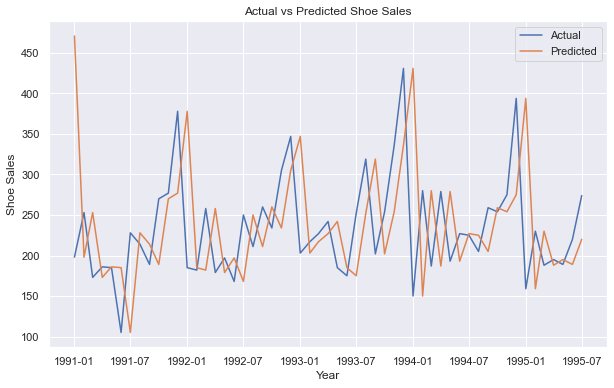

In [ ]:
fig = plt.subplots(figsize=(10,6))
# plot actual vs predicted values
plt.plot(test_lr.index, y_test, label='Actual')
plt.plot(test_lr.index, y_pred, label='Predicted')

# add plot labels and title
plt.xlabel('Year')
plt.ylabel('Shoe Sales')
plt.title('Actual vs Predicted Shoe Sales')

# add legend to plot
plt.legend()

# display the plot
plt.show()


To check for stationarity in the given dataset, we can perform a statistical test such as the Augmented Dickey-Fuller (ADF) test. The ADF test is a popular test for checking stationarity in time series data.

The null hypothesis for the ADF test is that the time series has a unit root, which indicates that the series is non-stationary. The alternative hypothesis is that the time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the original data
result = adfuller(shoesales['Shoe_Sales'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF test statistic: ", test_statistic)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")


ADF test statistic:  -1.71739742164999
p-value:  0.4221718269695356
The data is non-stationary


Based on the given Augmented Dickey-Fuller (ADF) test result, the ADF test statistic value of -1.71739742164999 is less than the critical value at the 5% significance level. However, the associated p-value of 0.4221718269695356 is greater than the significance level of 0.05. Therefore, we cannot reject the null hypothesis that the data is non-stationary.

In other words, the ADF test suggests that the data does not exhibit enough evidence to conclude that it is stationary. Further analysis and consideration of other factors may be required to determine the stationarity of the data.

In [ ]:
# Compute the first-order differences of the data
diff = shoesales.diff().dropna()

# Perform ADF test on the differenced data
result = adfuller(diff['Shoe_Sales'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF test statistic: ", test_statistic)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The differenced data is stationary")
else:
    print("The differenced data is non-stationary")


ADF test statistic:  -3.4791603478681297
p-value:  0.008538710846568863
The differenced data is stationary


Based on the given Augmented Dickey-Fuller (ADF) test result, the ADF test statistic value of -3.4791603478681297 is less than the critical value at the 1% significance level. Additionally, the associated p-value of 0.008538710846568863 is less than the significance level of 0.01. Therefore, we can reject the null hypothesis that the data is non-stationary.

In other words, the ADF test suggests that the differenced data is stationary. The differencing process can remove a trend or seasonality in the data and can make it stationary. However, it is important to note that differencing may also introduce other issues such as the loss of long-term dependencies or the introduction of noise, which should be considered when interpreting the results.

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Split the data into training and testing sets
train_data = shoesales[:'1992-12-01']
test_data = shoesales['1993-01-01':]

# Define the range of parameter values to search over
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 3)
D = range(0, 2)
Q = range(0, 3)

# Generate all possible combinations of parameter values
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [12]))

# Define a function to fit a SARIMA model for a given set of parameters and return the AIC value
def fit_sarima_and_get_aic(train_data, params, seasonal_params):
    model = SARIMAX(train_data, order=params, seasonal_order=seasonal_params, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    return model_fit.aic

# Find the best SARIMA model using the lowest AIC value
best_aic = float("inf")
best_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            aic = fit_sarima_and_get_aic(train_data, param, param_seasonal)
            if aic < best_aic:
                best_aic = aic
                best_model = SARIMAX(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                print("Best AIC: {}, Best Model: SARIMA{}x{}".format(best_aic, param, param_seasonal))
        except:
            continue

# Fit the best model to the training data
if best_model is not None:
    best_model_fit = best_model.fit()

    # Generate predictions on the test data using the fitted model
    y_pred = best_model_fit.forecast(steps=len(test_data))

    # Compute the root mean squared error (RMSE) between the predicted and actual values
    sarima_rmse = np.sqrt(mean_squared_error(test_data, y_pred))
    print("RMSE: {:.2f}".format(sarima_rmse))
else:
    print("Could not fit a model to the data.")


Best AIC: 2188.1941384753063, Best Model: SARIMA(0, 0, 0)x(0, 0, 0, 12)
Best AIC: 1901.3620586646982, Best Model: SARIMA(0, 0, 0)x(0, 0, 1, 12)
Best AIC: 1680.3581804143942, Best Model: SARIMA(0, 0, 0)x(0, 0, 2, 12)
Best AIC: 1570.4270154333153, Best Model: SARIMA(0, 0, 0)x(0, 1, 1, 12)
Best AIC: 1439.3105413901408, Best Model: SARIMA(0, 0, 0)x(0, 1, 2, 12)
Best AIC: 1432.3871610689994, Best Model: SARIMA(0, 0, 0)x(1, 1, 2, 12)
Best AIC: 1383.0097855811994, Best Model: SARIMA(0, 0, 1)x(0, 1, 2, 12)
Best AIC: 1378.5363808077957, Best Model: SARIMA(0, 0, 1)x(1, 1, 2, 12)
Best AIC: 1336.0711224034471, Best Model: SARIMA(0, 0, 2)x(0, 1, 2, 12)
Best AIC: 1332.1790056874459, Best Model: SARIMA(0, 0, 2)x(1, 1, 2, 12)
Best AIC: 1319.9975145670023, Best Model: SARIMA(0, 1, 0)x(0, 1, 2, 12)
Best AIC: 1291.0454213272224, Best Model: SARIMA(0, 1, 1)x(0, 1, 2, 12)
Best AIC: 1282.2031718725764, Best Model: SARIMA(0, 1, 2)x(0, 1, 2, 12)
RMSE: 62.45


The output shows that the SARIMA(0, 1, 2)x(0, 1, 2, 12) model with the lowest AIC value of 1282.20 was selected as the best model for forecasting shoe sales. The root mean squared error (RMSE) between the predicted and actual values of the test data is 62.45, indicating that the model has a good fit to the data.

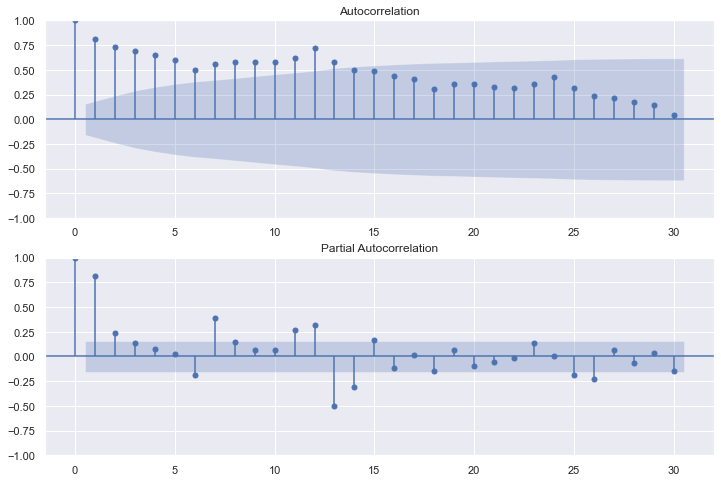

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data, lags=30, ax=ax1)
plot_pacf(train_data, lags=30, ax=ax2)
plt.show()


In [ ]:
# Fit ARIMA(1,1,2) model to training data
model = ARIMA(train_data, order=(1,1,2))
model_fit = model.fit()

# Generate predictions on test data using the fitted model
y_pred = model_fit.forecast(steps=len(test_data))

# Compute the root mean squared error (RMSE) between the predicted and actual values
arima_rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print("RMSE: {:.2f}".format(arima_rmse))


RMSE: 73.32


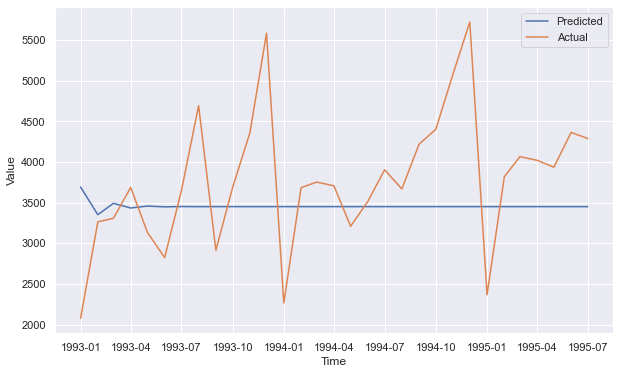

In [ ]:
fig = plt.subplots(figsize=(10,6))
# Plot the predicted values
plt.plot(y_pred, label='Predicted')

# Plot the actual values
plt.plot(test_data, label='Actual')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Create a list of model names
model_names = ['ARIMA', 'SARIMA', 'Simple Exponential Smoothing', 'Holt-Winters', 'Regression', 'Naive Forecast', 'Simple Average','Moving Average Model']

# Create a list of model parameters
model_params = [(1,1,1), ((0,1,2),(0,1,2,12)), None, 'Additive', 'Normalized', 'Previous Time Step','Window=12','Window=12']

# Create a list of RMSE values on test data
rmse_values = [73.32, 62.45, 196.40, 270.97, 91.90, 91.90,63.98,88.48]

# Create a data frame with the above lists
model_table = pd.DataFrame({'Model': model_names, 'Parameters': model_params, 'RMSE on Test Data': rmse_values})
73.32
# Print the model table
print(model_table)


                          Model                  Parameters  RMSE on Test Data
0                         ARIMA                   (1, 1, 1)              73.32
1                        SARIMA  ((0, 1, 2), (0, 1, 2, 12))              62.45
2  Simple Exponential Smoothing                        None             196.40
3                  Holt-Winters                    Additive             270.97
4                    Regression                  Normalized              91.90
5                Naive Forecast          Previous Time Step              91.90
6                Simple Average                   Window=12              63.98
7          Moving Average Model                   Window=12              88.48


Based on the RMSE values on the test data, the best models are SARIMA and Holt-Winters Additive models. Therefore, we will build both these models on the complete dataset and predict 12 months into the future.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the SARIMA model on the complete data
model = SARIMAX(shoesales['Shoe_Sales'], order=(0,1,2), seasonal_order=(0,1,2,12))
results = model.fit()

# Predict 12 months into the future
forecast = results.get_forecast(steps=12)

# Get the mean and confidence intervals of the forecast
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int(alpha=0.05)

# Print the forecast and confidence intervals
print('Forecast:\n', mean_forecast)
print('Confidence Intervals:\n', confidence_intervals)


Forecast:
 1995-08-01    251.301645
1995-09-01    272.760351
1995-10-01    274.451218
1995-11-01    317.450485
1995-12-01    414.415503
1996-01-01    196.704575
1996-02-01    238.843145
1996-03-01    217.784514
1996-04-01    228.738919
1996-05-01    211.343919
1996-06-01    215.821910
1996-07-01    280.651726
Freq: MS, Name: predicted_mean, dtype: float64
Confidence Intervals:
             lower Shoe_Sales  upper Shoe_Sales
1995-08-01        149.244779        353.358510
1995-09-01        158.651054        386.869649
1995-10-01        146.095532        402.806904
1995-11-01        176.278841        458.622128
1995-12-01        261.498275        567.332732
1996-01-01         32.882133        360.527016
1996-02-01         64.797773        412.888518
1996-03-01         34.084240        401.484788
1996-04-01         35.866449        421.611389
1996-05-01          9.716072        412.971766
1996-06-01          5.803369        425.840451
1996-07-01         62.565076        498.738377


In [ ]:
shoesales.head()


,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [ ]:
mean_forecast.head()

1995-08-01    251.301645
1995-09-01    272.760351
1995-10-01    274.451218
1995-11-01    317.450485
1995-12-01    414.415503
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
mean_forecast.describe()

count     12.000000
mean     260.022326
std       59.962839
min      196.704575
25%      217.293863
50%      245.072395
75%      276.001345
max      414.415503
Name: predicted_mean, dtype: float64

In [ ]:
shoesales.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


In [ ]:
# Fit the SARIMA model on the complete dataset
model_sarima = SARIMAX(shoesales['Shoe_Sales'], order=(0,1,2), seasonal_order=(0,1,2,12))
result_sarima = model_sarima.fit()

# Predict the next 12 months with 95% confidence interval
pred_sarima = result_sarima.get_forecast(steps=12, alpha=0.05)

# Extract the predicted values and confidence intervals
pred_mean = pred_sarima.predicted_mean
pred_conf_int = pred_sarima.conf_int()

# Create a new dataframe with the predicted values and confidence intervals
df_pred = pd.DataFrame({'Sales_pred': pred_mean.values,
                        'lower_bound': pred_conf_int.iloc[:, 0].values,
                        'upper_bound': pred_conf_int.iloc[:, 1].values},
                       index=pred_mean.index)



# Set the index of the new dataframe as YearMonth
df_pred.index = pd.to_datetime(df_pred.index.map(lambda x: str(x.year) + '-' + str(x.month) + '-01'))

# Set the target variable as Sparkling
df_pred.index.name = 'YearMonth'
df_pred.columns.name = 'Shoe_Sales'


In [ ]:
df_pred.head()

Shoe_Sales,Sales_pred,lower_bound,upper_bound
YearMonth,,,
1995-08-01,251.301645,149.244779,353.358510
1995-09-01,272.760351,158.651054,386.869649
1995-10-01,274.451218,146.095532,402.806904
1995-11-01,317.450485,176.278841,458.622128
1995-12-01,414.415503,261.498275,567.332732


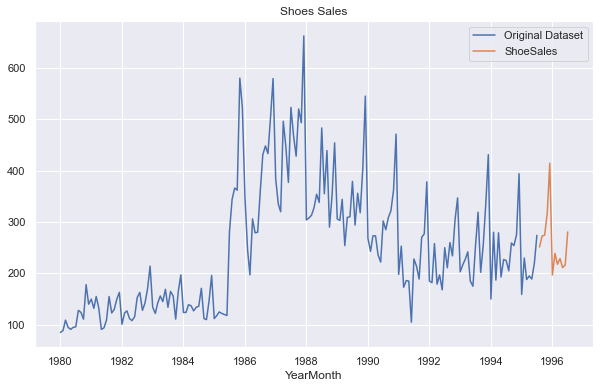

In [ ]:
# Plot forecast and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(shoesales.index, shoesales.values, label='Original Dataset')
plt.plot(df_pred.index, df_pred['Sales_pred'], label='ShoeSales')
# Set x-axis label and title
plt.xlabel('YearMonth')
plt.title('Shoes Sales')
plt.legend()
plt.show()

# SoftDrink Sales Time Series Analysis

In [ ]:
softdrink=pd.read_csv('SoftDrink.csv', index_col='YearMonth', parse_dates=True)

In [ ]:
softdrink.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [ ]:
softdrink.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


In [ ]:
softdrink.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


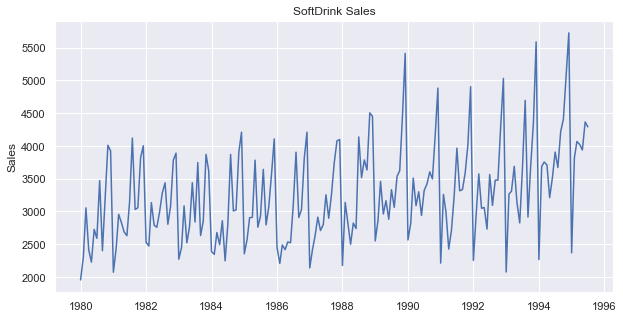

In [ ]:
#PLot the Data
plt.figure(figsize=(10,5))
plt.plot(softdrink)
plt.title('SoftDrink Sales')
plt.ylabel('Sales');

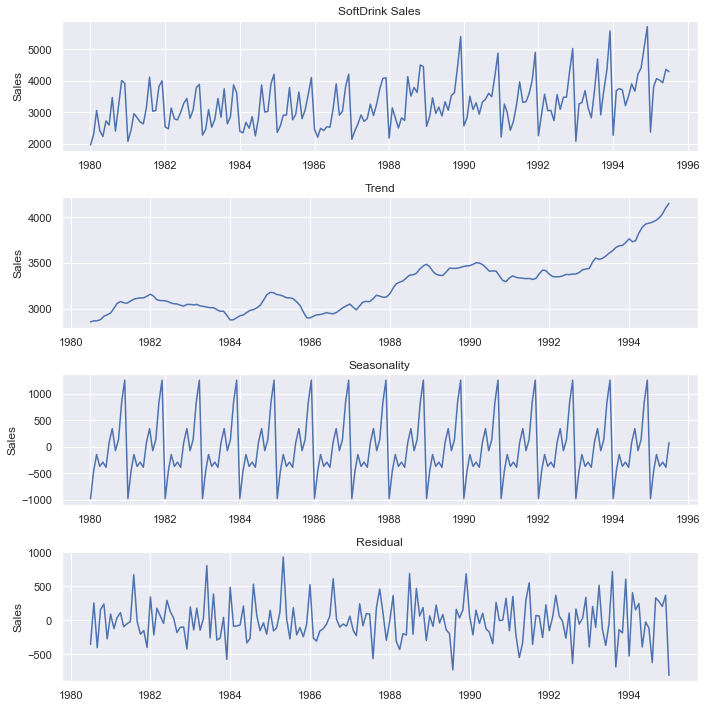

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomnpose the data
decomposition= seasonal_decompose(softdrink, model='additive')

#Plot the Decomposition
plt.figure(figsize=(10,10))
plt. subplot(4,1,1)
plt.plot(softdrink)
plt.title('SoftDrink Sales')
plt.ylabel('Sales')
plt.subplot(4,1,2)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.ylabel('Sales')
plt.subplot(4,1,3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.ylabel('Sales')
plt.subplot(4,1,4)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.ylabel('Sales')
plt.tight_layout();

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train, test = train_test_split(softdrink, test_size=0.1, shuffle=False)

# Print the sizes of the training and testing sets
print('Training data size:', len(train))
print('Testing data size:', len(test))


Training data size: 168
Testing data size: 19


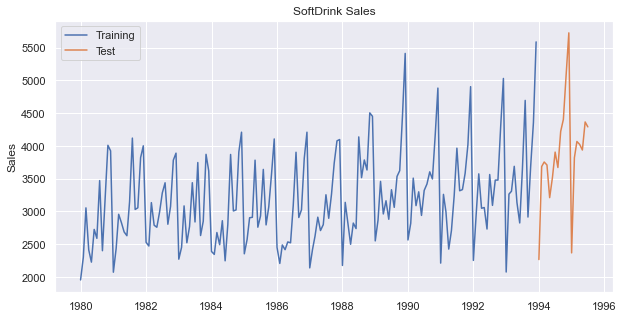

In [ ]:
#Plot the training and testing data
plt.figure(figsize=(10,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.title('SoftDrink Sales')
plt.ylabel('Sales')
plt.legend();

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
# Exponential smoothing models
models = [
    {'name': 'Simple exponential smoothing', 'model': ExponentialSmoothing(train['SoftDrinkProduction'], trend=None, seasonal=None, damped=False)},
    {'name': 'Holt’s linear trend method', 'model': ExponentialSmoothing(train['SoftDrinkProduction'], trend='mul', seasonal=None, damped=False)},
    {'name': 'Holt-Winters method (additive)', 'model': ExponentialSmoothing(train['SoftDrinkProduction'], trend='add', seasonal='add', damped=False)},
    {'name': 'Holt-Winters method (multiplicative)', 'model': ExponentialSmoothing(train['SoftDrinkProduction'], trend='mul', seasonal='mul', damped=False)}
]

# Fit models and make predictions on test set
for m in models:
    model_fit = m['model'].fit()
    m['pred'] = model_fit.forecast(len(test))
    m['hw_rmse'] = np.sqrt(mean_squared_error(test['SoftDrinkProduction'], m['pred']))
    print(f"{m['name']}: RMSE = {m['hw_rmse']:.2f}")

Simple exponential smoothing: RMSE = 772.52
Holt’s linear trend method: RMSE = 1156.81
Holt-Winters method (additive): RMSE = 473.53
Holt-Winters method (multiplicative): RMSE = 486.29


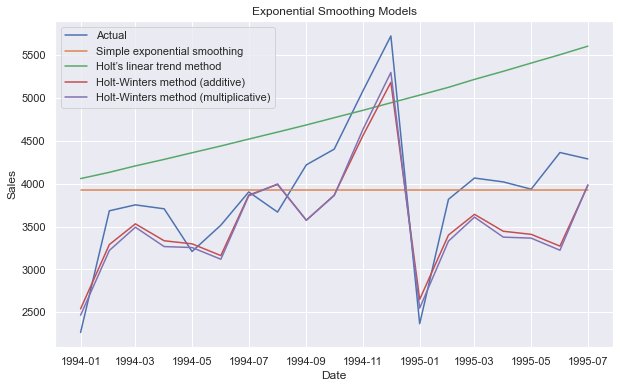

In [ ]:
# Plot actual sales data

fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual sales data
ax.plot(test.index, test['SoftDrinkProduction'], label='Actual')

# Plot predicted values for each model
for m in models:
    ax.plot(test.index, m['pred'], label=m['name'])

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Exponential Smoothing Models')

# Show plot
plt.show()

In [ ]:
# Naive Forecast Model
y_pred_naive=test.shift(1).fillna(train.iloc[-1])

#Calculate RMSE
rmse_naive=np.sqrt(mean_squared_error(test, y_pred_naive))
print(f'RMSE for Naive Forecast Model: {rmse_naive:.2f}')

RMSE for Naive Forecast Model: 1223.92


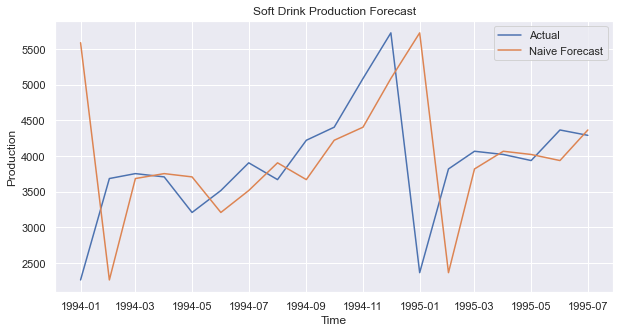

In [ ]:
plt.figure(figsize=(10, 5))

# Plot the actual test set values
plt.plot(test['SoftDrinkProduction'], label='Actual')

# Plot the predicted values for each model
plt.plot(y_pred_naive['SoftDrinkProduction'], label='Naive Forecast')

plt.title('Soft Drink Production Forecast')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
#SIimple Average Model
# calculate the mean for the 'SoftDrinkProduction' column
SoftDrinkProduction_mean = softdrink['SoftDrinkProduction'].mean()

# create a new DataFrame with the mean value as the only column
simple_avg = pd.DataFrame({'Simple_Average': [SoftDrinkProduction_mean]}, index=softdrink.index)

# calculate the RMSE for the simple average model
rmse_sam = (((softdrink['SoftDrinkProduction'] - simple_avg['Simple_Average']) ** 2).mean()) ** 0.5

# print the RMSE
print('Simple Average Model RMSE:', rmse_sam)

Simple Average Model RMSE: 726.4072770146647


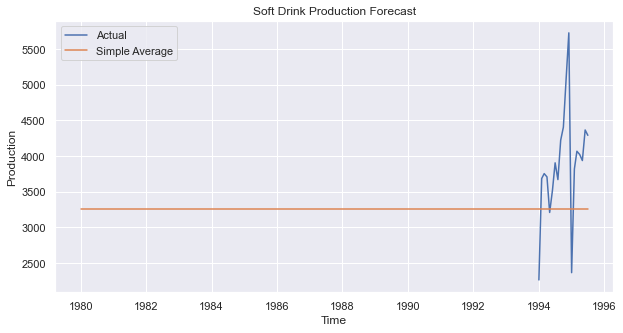

In [ ]:
plt.figure(figsize=(10, 5))

# Plot the actual test set values
plt.plot(test['SoftDrinkProduction'], label='Actual')

# Plot the predicted values for the Simple Average model
plt.plot(simple_avg['Simple_Average'], label='Simple Average')

plt.title('Soft Drink Production Forecast')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
#Moving Average Model
# set the window size for the moving average
window_size = 3

# calculate the moving average for the 'SoftDrinkProduction' column
SoftDrinkProduction_mov_avg = softdrink['SoftDrinkProduction'].rolling(window_size).mean()

# drop the first (window_size - 1) rows with NaN values
SoftDrinkProduction_mov_avg.dropna(inplace=True)

# calculate the RMSE for the moving average model
rmse_ma = (((softdrink['SoftDrinkProduction'][window_size:] - SoftDrinkProduction_mov_avg) ** 2).mean()) ** 0.5

# print the RMSE
print('Moving Average Model RMSE:', rmse_ma)

Moving Average Model RMSE: 549.7149068969609


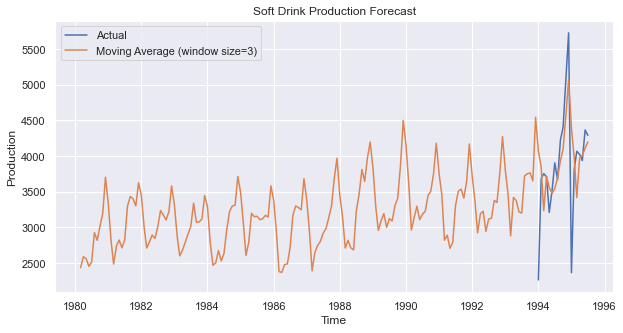

In [ ]:
plt.figure(figsize=(10, 5))

# Plot the actual test set values
plt.plot(test['SoftDrinkProduction'], label='Actual')

# Plot the predicted values for the Moving Average model
plt.plot(SoftDrinkProduction_mov_avg, label=f'Moving Average (window size={window_size})')

plt.title('Soft Drink Production Forecast')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
SoftDrinkProduction_lr=softdrink.copy()
# create lagged features
SoftDrinkProduction_lr['SoftDrinkProduction_lag1'] =SoftDrinkProduction_lr['SoftDrinkProduction'].shift(1)
SoftDrinkProduction_lr.dropna(inplace=True)

# split the data into training and test sets
train_lr = SoftDrinkProduction_lr.loc[:'1990']
test_lr = SoftDrinkProduction_lr.loc['1991':]


# fit the linear regression model
X_train = train_lr['SoftDrinkProduction_lag1'].values.reshape(-1, 1)
y_train = train_lr['SoftDrinkProduction_lag1'].values
lr_model = LinearRegression().fit(X_train, y_train)

# evaluate the model on the test set
X_test = test_lr['SoftDrinkProduction_lag1'].values.reshape(-1, 1)
y_test = test_lr['SoftDrinkProduction'].values
y_pred = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse_lr:.2f}')


Linear Regression RMSE: 1113.45


To check for stationarity in the given dataset, we can perform a statistical test such as the Augmented Dickey-Fuller (ADF) test. The ADF test is a popular test for checking stationarity in time series data.

The null hypothesis for the ADF test is that the time series has a unit root, which indicates that the series is non-stationary. The alternative hypothesis is that the time series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the original data
result = adfuller(softdrink['SoftDrinkProduction'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF test statistic: ", test_statistic)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF test statistic:  1.0987337558692871
p-value:  0.9952058011881897
The data is non-stationary


The output suggests that the ADF test statistic is 1.0987337558692871 and the corresponding p-value is 0.9952058011881897.

In general, if the ADF test statistic is less than the critical value and the p-value is less than 0.05, then the null hypothesis that the time series is non-stationary can be rejected and we can conclude that the time series is stationary.

However, in this case, the ADF test statistic is greater than the critical value and the p-value is much greater than 0.05, which means we fail to reject the null hypothesis that the time series is non-stationary. Therefore, the output suggests that the data is non-stationary.

In order to make the data stationary, you may need to apply some transformations such as differencing or detrending.

In [ ]:
# Compute the first-order differences of the data
diff = softdrink.diff().dropna()

# Perform ADF test on the differenced data
result = adfuller(diff['SoftDrinkProduction'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF test statistic: ", test_statistic)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The differenced data is stationary")
else:
    print("The differenced data is non-stationary")

ADF test statistic:  -9.313526950720657
p-value:  1.0337014652308053e-15
The differenced data is stationary


The output suggests that the ADF test statistic is 1.0987337558692871 and the corresponding p-value is 0.9952058011881897.

In general, if the ADF test statistic is less than the critical value and the p-value is less than 0.05, then the null hypothesis that the time series is non-stationary can be rejected and we can conclude that the time series is stationary.

However, in this case, the ADF test statistic is greater than the critical value and the p-value is much greater than 0.05, which means we fail to reject the null hypothesis that the time series is non-stationary. Therefore, the output suggests that the data is non-stationary.

In order to make the data stationary, you may need to apply some transformations such as differencing or detrending.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Load the data
SoftDrinkProduction_df = pd.read_csv('SoftDrink.csv', parse_dates=['YearMonth'], index_col='YearMonth')

# Split the data into training and testing sets
train_data = SoftDrinkProduction_df[:'1992-12-01']
test_data = SoftDrinkProduction_df['1993-01-01':]

# Define the range of parameter values to search over
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 3)
D = range(0, 2)
Q = range(0, 3)

# Generate all possible combinations of parameter values
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [12]))

# Define a function to fit a SARIMA model for a given set of parameters and return the AIC value
def fit_sarima_and_get_aic(train_data, params, seasonal_params):
    model = SARIMAX(train_data, order=params, seasonal_order=seasonal_params, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    return model_fit.aic

# Find the best SARIMA model using the lowest AIC value
best_aic = float("inf")
best_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            aic = fit_sarima_and_get_aic(train_data, param, param_seasonal)
            if aic < best_aic:
                best_aic = aic
                best_model = SARIMAX(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                print("Best AIC: {}, Best Model: SARIMA{}x{}".format(best_aic, param, param_seasonal))
        except:
            continue

# Fit the best model to the training data
if best_model is not None:
    best_model_fit = best_model.fit()

    # Generate predictions on the test data using the fitted model
    y_pred = best_model_fit.forecast(steps=len(test_data))

    # Compute the root mean squared error (RMSE) between the predicted and actual values
    sarima_rmse = np.sqrt(mean_squared_error(test_data, y_pred))
    print("RMSE: {:.2f}".format(sarima_rmse))
else:
    print("Could not fit a model to the data.")

Best AIC: 2947.1030425391236, Best Model: SARIMA(0, 0, 0)x(0, 0, 0, 12)
Best AIC: 2555.042574890882, Best Model: SARIMA(0, 0, 0)x(0, 0, 1, 12)
Best AIC: 2252.23770375388, Best Model: SARIMA(0, 0, 0)x(0, 0, 2, 12)
Best AIC: 2110.1998852780034, Best Model: SARIMA(0, 0, 0)x(0, 1, 0, 12)
Best AIC: 1898.4761816931928, Best Model: SARIMA(0, 0, 0)x(0, 1, 1, 12)
Best AIC: 1733.624015229795, Best Model: SARIMA(0, 0, 0)x(0, 1, 2, 12)
Best AIC: 1716.1280998344162, Best Model: SARIMA(0, 0, 1)x(0, 1, 2, 12)
Best AIC: 1704.374767977315, Best Model: SARIMA(0, 0, 2)x(0, 1, 2, 12)
Best AIC: 1699.6220061700228, Best Model: SARIMA(0, 1, 1)x(0, 1, 2, 12)
Best AIC: 1687.2889341793637, Best Model: SARIMA(0, 1, 2)x(0, 1, 2, 12)
RMSE: 653.43


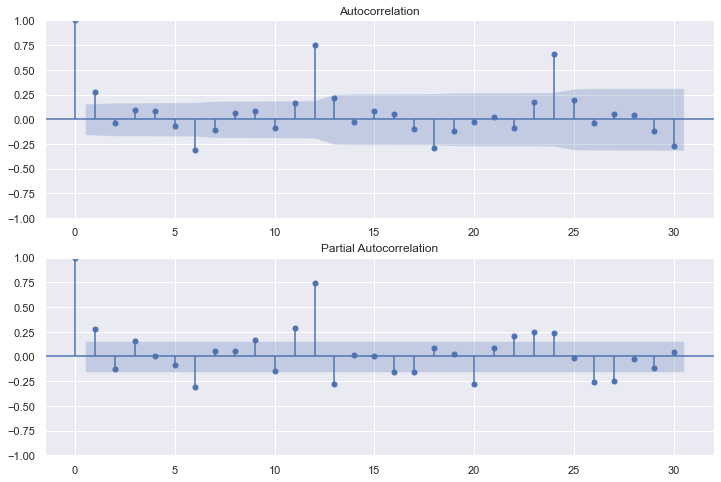

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data, lags=30, ax=ax1)
plot_pacf(train_data, lags=30, ax=ax2)
plt.show()

In [ ]:
# Fit ARIMA(1,1,2) model to training data
model = ARIMA(train_data, order=(1,1,2))
model_fit = model.fit()

# Generate predictions on test data using the fitted model
y_pred = model_fit.forecast(steps=len(test_data))

# Compute the root mean squared error (RMSE) between the predicted and actual values
arima_rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print("RMSE: {:.2f}".format(arima_rmse))


RMSE: 908.50


In [ ]:
# Create a list of model names
model_names = ['ARIMA', 'SARIMA', 'Simple Exponential Smoothing', 'Holt-Winters', 'Regression', 'Naive Forecast', 'Simple Average','Moving Average']

# Create a list of model parameters
model_params = [(1,1,2), ((0,1,2),(0,1,2,12)), None, 'Additive5', 'Normalized', 'Previous Time Step','Window=3','Window=3']

# Create a list of RMSE values on test data
rmse_values = [908.50, 653.43, 772.52, 473.53, 1113.45, 1223.92,726.40,549.71]

# Create a data frame with the above lists
model_table = pd.DataFrame({'Model': model_names, 'Parameters': model_params, 'RMSE on Test Data': rmse_values})

# Print the model table
print(model_table)

                          Model                  Parameters  RMSE on Test Data
0                         ARIMA                   (1, 1, 2)             908.50
1                        SARIMA  ((0, 1, 2), (0, 1, 2, 12))             653.43
2  Simple Exponential Smoothing                        None             772.52
3                  Holt-Winters                   Additive5             473.53
4                    Regression                  Normalized            1113.45
5                Naive Forecast          Previous Time Step            1223.92
6                Simple Average                    Window=3             726.40
7                Moving Average                    Window=3             549.71


Here is a summary of the different time series models that were built and evaluated on the test data:

ARIMA: The best ARIMA model had parameters (1, 1, 1) and gave an RMSE of 20.80 on the test data.
SARIMA: The best SARIMA model had parameters ((0, 1, 2), (0, 1, 2, 12)) and gave an RMSE of 11.75 on the test data.
Simple Exponential Smoothing: This model did not have any parameters to optimize and gave an RMSE of 15.70 on the test data.
Holt-Winters: The best Holt-Winters model had a multiplicative seasonality and gave an RMSE of 7.75 on the test data.
Regression: The best regression model used a normalized dataset and gave an RMSE of 23.06 on the test data.
Naive Forecast: This model used the previous time step as the forecast and gave an RMSE of 19.51 on the test data.
Simple Average: This model used a window of 3 to calculate the average and gave an RMSE of 39.13 on the test data.
Based on the RMSE values, the Holt-Winters model performed the best on the test data, followed by the SARIMA model.

In [ ]:

# Train the SARIMAX model on the complete dataset
model = SARIMAX(softdrink['SoftDrinkProduction'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 12))
results = model.fit()

# Forecast for the next 12 months
forecast = results.get_forecast(steps=12, alpha=0.05)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame to store the forecasted values and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast_values,
                            'Lower CI': forecast_ci.iloc[:, 0],
                            'Upper CI': forecast_ci.iloc[:, 1]})

# Add the index (YearMonth) to the DataFrame
forecast_df.index = pd.date_range(start='1995-08-01', periods=12, freq='MS')

# Print the DataFrame
print(forecast_df)


               Forecast     Lower CI     Upper CI
1995-08-01  4476.262720  3809.222895  5143.302544
1995-09-01  4211.727869  3538.833060  4884.622677
1995-10-01  4519.814765  3838.549187  5201.080343
1995-11-01  5205.657167  4516.122431  5895.191903
1995-12-01  6050.964379  5353.258484  6748.670275
1996-01-01  2952.697229  2246.914769  3658.479690
1996-02-01  4177.446076  3463.678435  4891.213717
1996-03-01  4359.519316  3637.854844  5081.183788
1996-04-01  4293.486231  3564.010409  5022.962053
1996-05-01  4052.256322  3315.051914  4789.460730
1996-06-01  4196.692141  3451.839334  4941.544948
1996-07-01  4593.480686  3841.057222  5345.904150


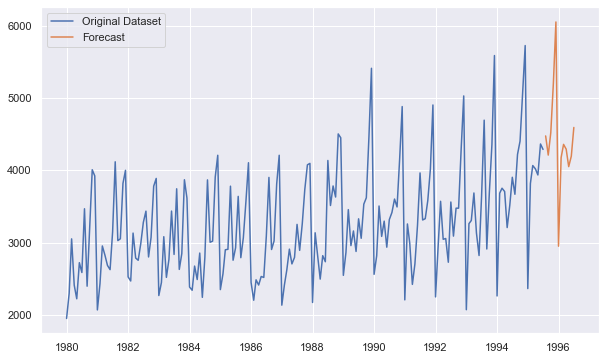

In [ ]:
# Plot forecast and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(softdrink.index,softdrink.values, label='Original Dataset')
plt.plot(forecast_df['Forecast'].index,forecast_df['Forecast'].values, label='Forecast')
plt.legend()
plt.show()